In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("LoanApprovalPrediction_cleaned.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [5]:

X = df.drop(columns=['Married'])
y = df['Married']


In [11]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Gender', 'Dependents', 'LoanAmount', 'Property_Area', 'Loan_Status']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [12]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
145,-2.094609,-0.758447,0,0,10000,1666.0,9.859870e-01,360.0,1.000000,-1.316443,-1.482518
9,0.477416,0.244826,0,0,12841,10968.0,2.513671e+00,360.0,1.000000,-0.048757,-1.482518
374,-2.094609,-0.758447,0,0,6000,0.0,1.359047e-01,360.0,1.000000,1.218929,0.674528
521,-2.094609,-0.758447,1,1,18165,0.0,-2.460163e-01,360.0,1.000000,1.218929,0.674528
188,0.477416,-0.758447,0,0,3858,0.0,-8.496980e-01,360.0,1.000000,-0.048757,0.674528
...,...,...,...,...,...,...,...,...,...,...,...
71,0.477416,-0.758447,0,0,3500,0.0,-7.880978e-01,300.0,1.000000,-0.048757,0.674528
106,0.477416,1.248100,0,0,3800,3600.0,8.751067e-01,360.0,0.000000,1.218929,-1.482518
270,0.477416,-0.758447,0,0,3993,3274.0,7.642264e-01,360.0,1.000000,-0.048757,0.674528
435,0.477416,-0.758447,0,0,7333,8333.0,3.699853e-01,300.0,0.843352,-1.316443,0.674528


In [14]:
# Check class distribution
print(y.value_counts())

# Check class distribution in percentage
print("\nClass Distribution (in %):\n", y.value_counts(normalize=True) * 100)

Married
1    388
0    210
Name: count, dtype: int64

Class Distribution (in %):
 Married
1    64.882943
0    35.117057
Name: proportion, dtype: float64


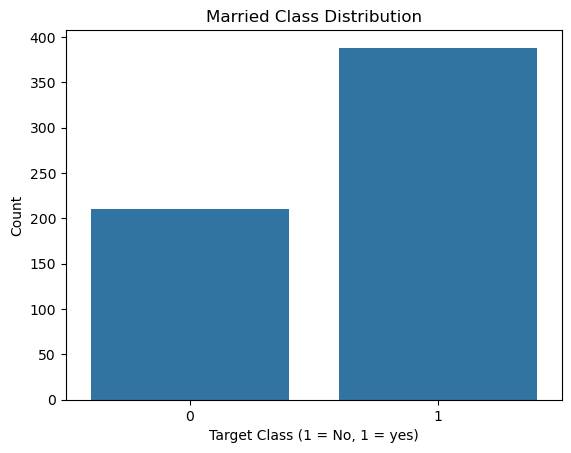

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Married Class Distribution')
plt.xlabel('Target Class (1 = No, 1 = yes)')
plt.ylabel('Count')
plt.show()

In [16]:
# Train Models
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier( random_state=42)
forest_model = RandomForestClassifier(n_estimators=150, random_state=42)


log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=150, random_state=42)

In [19]:
# Predict and Accuracy
log_acc = accuracy_score(y_test, log_model.predict(X_test))
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))
forest_acc = accuracy_score(y_test, forest_model.predict(X_test))

print("Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100}%")
print(f"Decision Tree Accuracy: {tree_acc*100}%")
print(f"Random Forest Accuracy: {forest_acc*100}%")

Model Accuracies:
Logistic Regression Accuracy: 83.33333333333334%
Decision Tree Accuracy: 71.66666666666667%
Random Forest Accuracy: 81.66666666666667%


In [32]:
# User Input for Prediction
print("\n Enter Customer details to predict Loan:")

input_data = {
    'Gender': float(input("Enter Gender: (1-Female,2=Male):")),
    'Education': float(input("Enter Education (1=not Educated, 0=Educated): ")),
    'LoanAmount': int(input("Enter Loan Amount")),
    'Loan_Amount_Term': int(input("Enter terms ")),
    'Property_Area': float(input("Property_Area")),
    'Loan_Status': float(input("loan Status(Approved,Rejected,Paid,closed) ")),
}


 Enter Customer details to predict Loan:


Enter Gender: (1-Female,2=Male): 1
Enter Education (1=not Educated, 0=Educated):  1
Enter Loan Amount 20000
Enter terms  5
 Property_Area 2.8
loan Status(1=Approved,2=Rejected,3=Paid,4=closed)  1


 Model Accuracies:
Logistic Regression Accuracy: 83.33%
Decision Tree Accuracy: 71.67%
Random Forest Accuracy: 81.67%

 Confusion Matrix - Logistic Regression:
 [[22 14]
 [ 6 78]]

 Confusion Matrix - Decision Tree:
 [[24 12]
 [22 62]]

 Confusion Matrix - Random Forest:
 [[23 13]
 [ 9 75]]


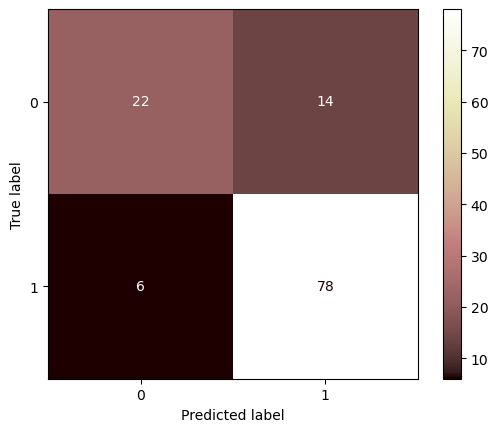

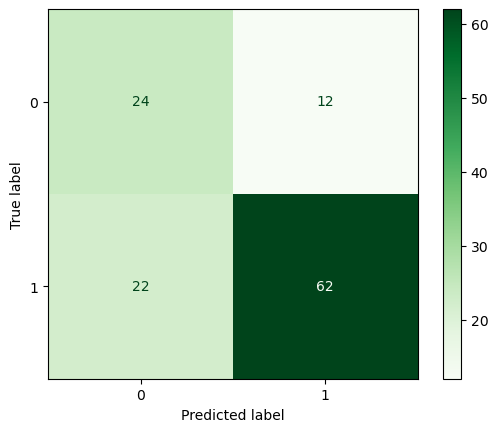

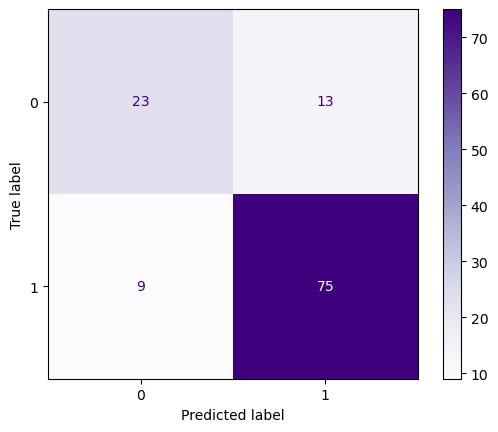

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predict on test data
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds= forest_model.predict(X_test)

# Accuracy Scores
log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
forest_acc = accuracy_score(y_test, forest_preds)

# Print Accuracies
print(" Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc*100:.2f}%")
print(f"Decision Tree Accuracy: {tree_acc*100:.2f}%")
print(f"Random Forest Accuracy: {forest_acc*100:.2f}%")

#  Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, log_preds)
print("\n Confusion Matrix - Logistic Regression:\n", cm_log)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1]).plot(cmap='pink')

#  Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, tree_preds)
print("\n Confusion Matrix - Decision Tree:\n", cm_tree)
ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1]).plot(cmap='Greens')

#  Confusion Matrix for Random Forest
cm_forest = confusion_matrix(y_test, forest_preds)
print("\n Confusion Matrix - Random Forest:\n", cm_forest)
ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=[0, 1]).plot(cmap='Purples')


In [34]:
import pickle as pkl


In [35]:
pkl.dump(forest_model,open("Loan_prediction.pkl","wb"))